# 01. Data Exploration

In this notebook, we verify the dataset structure, load sample audio files, and visualize their waveforms and spectrograms.

## 1. Setup

In [10]:
import os
import glob
import torch
import torchaudio
import matplotlib.pyplot as plt
import IPython.display as ipd

# Set path to processed data
DATA_PATH = '../data/processed'

print(f"Checking data path: {DATA_PATH}")

Checking data path: ../data/processed


## 2. Load Audio Sample
We load a random file from digit '5'. We check for both .ogg and .wav files (converted from m4a).

In [11]:
sample_digit = 5
sample_files = []
for ext in ['*.ogg', '*.wav']:
    sample_files.extend(glob.glob(os.path.join(DATA_PATH, str(sample_digit), ext)))

if sample_files:
    file_path = sample_files[0]
    print(f"Loading: {file_path}")
    waveform, sample_rate = torchaudio.load(file_path)

    print(f"Shape: {waveform.shape}")
    print(f"Sample Rate: {sample_rate}")
else:
    print("No files found for digit 5")

Loading: ../data/processed/5/Source_Nahom_Person_3_telegram_audio 6.ogg
Shape: torch.Size([1, 40968])
Sample Rate: 48000


## 3. Visualize Waveform

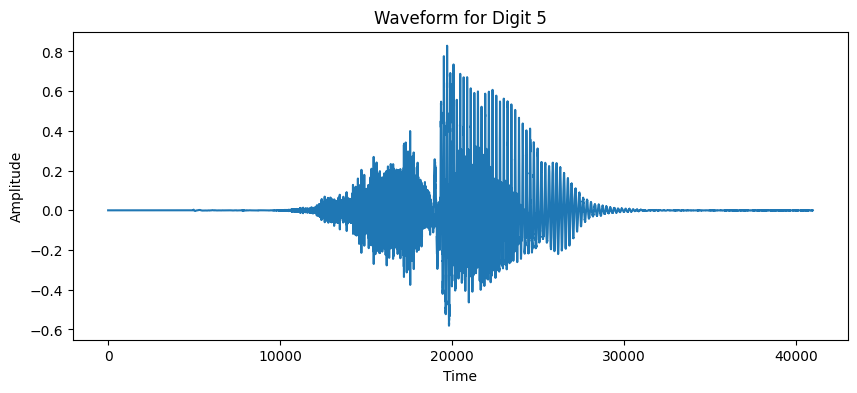

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.title(f"Waveform for Digit {sample_digit}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## 4. Visualize MelSpectrogram

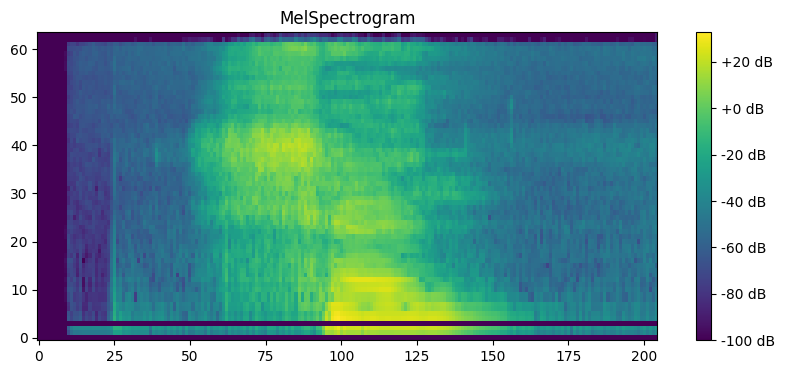

In [9]:
mel_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_mels=64)
db_transform = torchaudio.transforms.AmplitudeToDB()

melspec = mel_transform(waveform)
melspec = db_transform(melspec)

plt.figure(figsize=(10, 4))
plt.imshow(melspec[0].numpy(), aspect='auto', origin='lower')
plt.title("MelSpectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()